In [21]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
# 데이터 불러오기
(train_data,train_label),(test_data,test_label)=keras.datasets.fashion_mnist.load_data()

In [23]:
# (60000, 28, 28)
train_data.shape

(60000, 28, 28)

In [24]:
# 3차원 데이터 변환
# (60000, 28, 28, 1)
train_scaled=train_data.reshape(-1,28,28,1)
test_scaled=test_data.reshape(-1,28,28,1)


In [25]:
train_scaled=train_scaled/255.0
test_scaled=test_scaled/255.0

In [26]:
sub_data,val_data,sub_label,val_label=train_test_split(train_scaled,train_label)
sub_data.shape,val_data.shape

((45000, 28, 28, 1), (15000, 28, 28, 1))

In [27]:
# 합성곱 신경망 선언
model=keras.Sequential()

# CNN
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
# 최대풀링
model.add(keras.layers.MaxPool2D(2))
# CNN - 두번째 합성곱
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
# 최대풀링
model.add(keras.layers.MaxPool2D(2))

In [28]:
# 인공신경망의 선언
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [30]:
# from tensorflow.keras.utils import plot_model
# keras.utils.plot_model(model,show_shapes=True)

In [31]:
# 모델 훈련
# 순환신경망 설정 adam, RMSprop
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy',metrics='accuracy')


In [32]:
# 콜백 - 20번돌고나서, 가장 낮은 손실률을 저장
check_cb=keras.callbacks.ModelCheckpoint('cnn-test.h5',save_best_only=True)
early_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)


In [33]:

history=model.fit(sub_data,sub_label,epochs=20,batch_size=64,\
    validation_data=(val_data,val_label),callbacks=[check_cb,early_cb])


Epoch 1/20
704/704 [==============================] - 17s 23ms/step - loss: 0.9223 - accuracy: 0.6794 - val_loss: 0.6307 - val_accuracy: 0.7657
Epoch 2/20
704/704 [==============================] - 17s 24ms/step - loss: 0.5763 - accuracy: 0.7920 - val_loss: 0.4637 - val_accuracy: 0.8314
Epoch 3/20
704/704 [==============================] - 17s 24ms/step - loss: 0.5008 - accuracy: 0.8233 - val_loss: 0.4217 - val_accuracy: 0.8480
Epoch 4/20
704/704 [==============================] - 16s 23ms/step - loss: 0.4583 - accuracy: 0.8387 - val_loss: 0.3913 - val_accuracy: 0.8623
Epoch 5/20
704/704 [==============================] - 16s 23ms/step - loss: 0.4283 - accuracy: 0.8481 - val_loss: 0.3836 - val_accuracy: 0.8615
Epoch 6/20
704/704 [==============================] - 16s 23ms/step - loss: 0.4083 - accuracy: 0.8554 - val_loss: 0.3659 - val_accuracy: 0.8665
Epoch 7/20
704/704 [==============================] - 16s 23ms/step - loss: 0.3904 - accuracy: 0.8628 - val_loss: 0.3416 - val_accuracy:

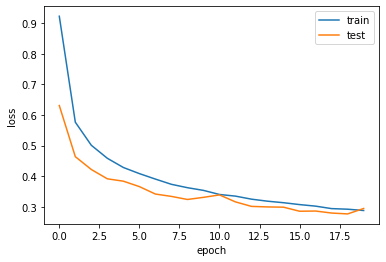

In [34]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [35]:
# 정확도
score= model.evaluate(val_data,val_label)
print('loss, accuracy : ', score)


469/469 [==============================] - 2s 4ms/step - loss: 0.2944 - accuracy: 0.8944
loss, accuracy :  [0.2943969964981079, 0.8944000005722046]


In [36]:
# 예측
results=model.predict(val_data[0:1])
print(results)

1/1 [==============================] - 0s 71ms/step
[[3.28922615e-05 1.04379967e-06 1.82862670e-04 9.74292397e-01
  2.44262926e-02 4.05326661e-09 1.05020555e-03 1.77624115e-09
  1.42535791e-05 1.35158755e-08]]


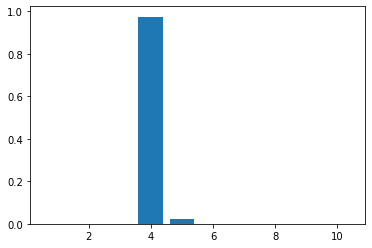

In [37]:
plt.bar(range(1,11),results[0])
plt.show()

In [38]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵클부츠']

In [40]:
classes[np.argmax(results)]

'드레스'